In [4]:
import numpy as np
import dfield_generator as dg
from matplotlib import pyplot as plt

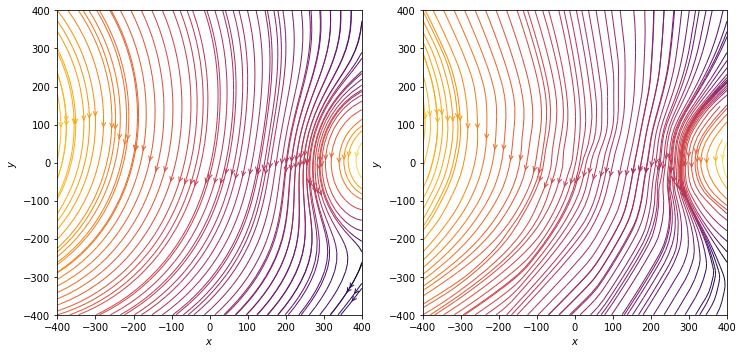

In [7]:
def make_compare_plot_new(a):
    nx, ny = 500, 500
    XMAX, YMAX = 400, 400
    x = np.linspace(-XMAX, XMAX, nx)
    y = np.linspace(-YMAX, YMAX, ny)
    X, Y = np.meshgrid(x, y)
    
    
    theta0 = -30.6
    s0 = 62
    n,th = 5,600
    
    
    theta = theta0 + n*a
    s = s0 + th*a

    polar1 = dg.DipoleMoment(name = 1, position = [500,0],
                             alpha= np.radians(9.6),
                             B0 = 5e6,outputinfo=False)

    polar2 = dg.DipoleMoment(name = 2, position = [-1000,0],
                             alpha= np.radians(theta),
                             B0 = 1e6 * s,outputinfo=False)
    


    Bx_1, By_1 = polar1.get_field(X,Y)


    Bx_2, By_2 = polar2.get_field(X,Y)
    Bx, By = Bx_1 + Bx_2, By_1 + By_2


    fig,axs = plt.subplots(1,2, figsize = (12,6))

    # Plot the streamlines with an appropriate colormap and arrow style
    color = 2 * np.log(np.hypot(Bx, By))
    axs[0].streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1, arrowstyle='->', arrowsize=1,broken_streamlines=False)


    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$y$')
    axs[0].set_xlim(-XMAX, XMAX)
    axs[0].set_ylim(-YMAX, YMAX)
    axs[0].set_aspect('equal')
    
    
    positions = np.vstack([X.ravel(), Y.ravel()])
    axy_new = np.zeros((len(positions.T),3))
    axy_new[:,0] = a
    axy_new[:,1:] = positions.T
    
    
    #result = np.array(model(axy_new))
#     result_pinn_Bx,result_pinn_By = pinn.predict(axy_new)
    
    
    
    
#     Bx_model_pinn ,By_model_pinn = result_pinn_Bx.reshape((nx,ny)),result_pinn_By.reshape((nx,ny))
    
    
    
    
    
    
    # save Bx_model_pinn By_model_pinn
    
    file_name = str(a) + '_B_alpha0.npy'
    with open(file_name, 'rb') as f:
        Bx_model_pinn = np.load(f)
        By_model_pinn = np.load(f)
        
    axs[1].streamplot(x, y, Bx_model_pinn ,By_model_pinn, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1, arrowstyle='->', arrowsize=1,broken_streamlines=False)


    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$y$')
    axs[1].set_xlim(-XMAX, XMAX)
    axs[1].set_ylim(-YMAX, YMAX)
    axs[1].set_aspect('equal')
    
    plt.show()
    

make_compare_plot_new(1)

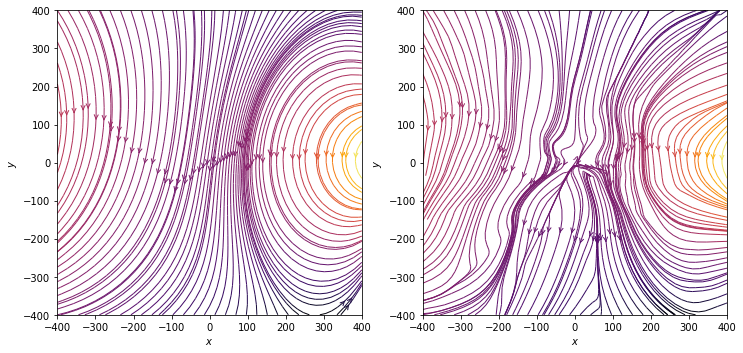

In [8]:
make_compare_plot_new(0)

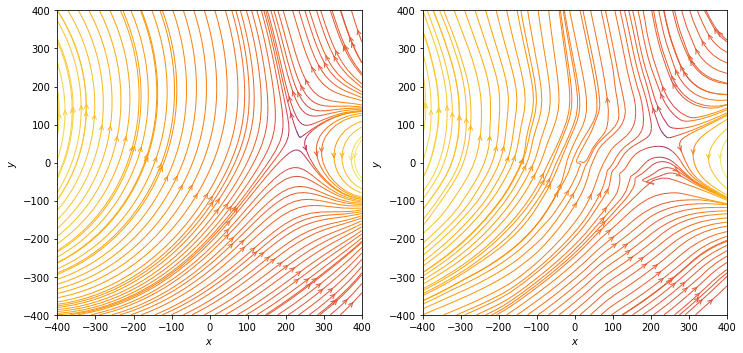

In [9]:
make_compare_plot_new(-1)